## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_136650_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (75930, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts      er   pac        lng  \
0      GBBZT02500A231107086  2024-04-17 18:45:00     NaN  0.61  109.15411   
1      GBBZT02500A231107086  2024-04-17 18:50:00     NaN  0.45  109.15411   
2      GBBZT02500A231107086  2024-04-17 18:55:00     NaN  0.29  109.15411   
3      GBBZT02500A231107086  2024-04-17 19:00:00     NaN  0.17  109.15411   
4      GBBZT02500A231107086  2024-04-17 19:05:00     NaN  0.12  109.15411   
...                     ...                  ...     ...   ...        ...   
75925  GBBZT02500A231107086  2025-05-10 19:15:00  3000.0  0.02  109.15411   
75926  GBBZT02500A231107086  2025-05-10 19:20:00  3000.0  0.02  109.15411   
75927  GBBZT02500A231107086  2025-05-10 19:25:00  3000.0  0.02  109.15411   
75928  GBBZT02500A231107086  2025-05-10 19:30:00  3000.0  0.02  109.15411   
75929  GBBZT02500A231107086  2025-05-10 19:35:00  3000.0  0.02  109.15411   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      22.370522     阳光棚双坡    5.0         28.3409               68.0565  ...   
1      22.370522     阳光棚双坡    5.0             NaN                   NaN  ...   
2      22.370522     阳光棚双坡    5.0             NaN                   NaN  ...   
3      22.370522     阳光棚双坡    5.0         28.0001               69.0540  ...   
4      22.370522     阳光棚双坡    5.0             NaN                   NaN  ...   
...          ...       ...    ...             ...                   ...  ...   
75925  22.370522     阳光棚双坡    5.0         23.8553               94.7863  ...   
75926  22.370522     阳光棚双坡    5.0             NaN                   NaN  ...   
75927  22.370522     阳光棚双坡    5.0             NaN                   NaN  ...   
75928  22.370522     阳光棚双坡    5.0         23.6530               95.1824  ...   
75929  22.370522     阳光棚双坡    5.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                       37.6894             9.4160          3.3810   
1                           NaN                NaN             NaN   
2                           NaN                NaN             NaN   
3                       18.8447             4.7080          3.1388   
4                           NaN                NaN             NaN   
...                         ...                ...             ...   
75925                    0.8688             1.1841          2.7103   
75926                       NaN                NaN             NaN   
75927                       NaN                NaN             NaN   
75928                    0.0000             0.0000          3.0992   
75929                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0              5.9822           6.6912            204.4330   
1                 NaN              NaN                 NaN   
2                 NaN              NaN                 NaN   
3              5.7582           6.4879            199.6013   
4                 NaN              NaN                 NaN   
...               ...              ...                 ...   
75925          4.9196           5.5295             32.3370   
75926             NaN              NaN                 NaN   
75927             NaN              NaN                 NaN   
75928          5.4905           6.1417             31.7685   
75929             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                206.1218             206.5176  2024-04-17 18:45:00   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                202.8188             203.5164  2024-04-17 19:00:00   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
75925             36.6622              37.7657  2025-05-

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                    sn                   ts      er  \
0      2024-04-17 18:45:00  GBBZT02500A231107086  2024-04-17 18:45:00     NaN   
1      2024-04-17 18:50:00  GBBZT02500A231107086  2024-04-17 18:50:00     NaN   
2      2024-04-17 18:55:00  GBBZT02500A231107086  2024-04-17 18:55:00     NaN   
3      2024-04-17 19:00:00  GBBZT02500A231107086  2024-04-17 19:00:00     NaN   
4      2024-04-17 19:05:00  GBBZT02500A231107086  2024-04-17 19:05:00     NaN   
...                    ...                   ...                  ...     ...   
111750 2025-05-10 19:15:00  GBBZT02500A231107086  2025-05-10 19:15:00  3000.0   
111751 2025-05-10 19:20:00  GBBZT02500A231107086  2025-05-10 19:20:00  3000.0   
111752 2025-05-10 19:25:00  GBBZT02500A231107086  2025-05-10 19:25:00  3000.0   
111753 2025-05-10 19:30:00  GBBZT02500A231107086  2025-05-10 19:30:00  3000.0   
111754 2025-05-10 19:35:00  GBBZT02500A231107086  2025-05-10 19:35:00  3000.0   

         pac        lng        lat roof_type  angle  temperature_2m  ...  \
0       0.61  109.15411  22.370522     阳光棚双坡    5.0         28.3409  ...   
1       0.45  109.15411  22.370522     阳光棚双坡    5.0             NaN  ...   
2       0.29  109.15411  22.370522     阳光棚双坡    5.0             NaN  ...   
3       0.17  109.15411  22.370522     阳光棚双坡    5.0         28.0001  ...   
4       0.12  109.15411  22.370522     阳光棚双坡    5.0             NaN  ...   
...      ...        ...        ...       ...    ...             ...  ...   
111750  0.02  109.15411  22.370522     阳光棚双坡    5.0         23.8553  ...   
111751  0.02  109.15411  22.370522     阳光棚双坡    5.0             NaN  ...   
111752  0.02  109.15411  22.370522     阳光棚双坡    5.0             NaN  ...   
111753  0.02  109.15411  22.370522     阳光棚双坡    5.0         23.6530  ...   
111754  0.02  109.15411  22.370522     阳光棚双坡    5.0             NaN  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                 5.8850                   37.6894             9.4160   
1                    NaN                       NaN                NaN   
2                    NaN                       NaN                NaN   
3                 2.9425                   18.8447             4.7080   
4                    NaN                       NaN                NaN   
...                  ...                       ...                ...   
111750            0.1480                    0.8688             1.1841   
111751               NaN                       NaN                NaN   
111752               NaN                       NaN                NaN   
111753            0.0000                    0.0000             0.0000   
111754               NaN                       NaN                NaN   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0               3.3810          5.9822           6.6912            204.4330   
1                  NaN             NaN              NaN                 NaN   
2                  NaN             NaN              NaN                 NaN   
3               3.1388          5.7582           6.4879            199.6013   
4                  NaN             NaN              NaN                 NaN   
...                ...             ...              ...                 ...   
111750          2.7103          4.9196           5.5295             32.3370   
111751             NaN             NaN              NaN                 NaN   
111752             NaN             NaN              NaN                 NaN   
111753          3.0992          5.4905           6.1417             31.7685   
111754             NaN             NaN              NaN                 NaN   

        wind_direction_80m  wind_direction_120m        variable_date  
0                 206.1218             206.5176  2024-04-17 18:45:00  
1                      NaN                  NaN                  NaN  
2                      NaN                  NaN                  NaN  
3                 202

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    13,     14,     15,     16,     17,     18,     19,     20,     21,
            22,
        ...
        111584, 111585, 111586, 111587, 111588, 111589, 111590, 111591, 111592,
        111593],
       dtype='int64', length=53764),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    13,     14,     15,     16,     17,     18,     19,     20,     21,
            22,
        ...
        111584, 111585, 111586, 111587, 111588, 111589, 111590, 111591, 111592,
        111593],
       dtype='int64', length=53764),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
             9,
        ...
        111584, 111585, 111586, 111587, 111588, 111589, 111590, 111591, 111592,
        111593],
       dtype='int64', length=98297),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    13,     14,     15,     16,     17,     18,     19,     20,     21,
            22,
        ...
        111584, 111585, 111586, 111587, 111588, 111589, 111590, 111591, 111592,
        111593],
       dtype='int64', length=53764),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    13,     14,     15,     16,     17,     18,     19,     20,     21,
            22,
        ...
        111584, 111585, 111586, 111587, 111588, 111589, 111590, 111591, 111592,
        111593],
       dtype='int64', length=53764),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([     1,      2,      4,      5,      7,      8,     10,     11,     13,
            14,
        ...
        111740, 111742, 111743, 111745, 111746, 111748, 111749, 111751, 111752,
        111754],
       dtype='int64', length=74503),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                    sn                   ts      er  \
0      2024-04-17 18:45:00  GBBZT02500A231107086  2024-04-17 18:45:00     0.0   
1      2024-04-17 18:50:00  GBBZT02500A231107086  2024-04-17 18:50:00     0.0   
2      2024-04-17 18:55:00  GBBZT02500A231107086  2024-04-17 18:55:00     0.0   
3      2024-04-17 19:00:00  GBBZT02500A231107086  2024-04-17 19:00:00     0.0   
4      2024-04-17 19:05:00  GBBZT02500A231107086  2024-04-17 19:05:00     0.0   
...                    ...                   ...                  ...     ...   
111750 2025-05-10 19:15:00  GBBZT02500A231107086  2025-05-10 19:15:00  3000.0   
111751 2025-05-10 19:20:00  GBBZT02500A231107086  2025-05-10 19:20:00  3000.0   
111752 2025-05-10 19:25:00  GBBZT02500A231107086  2025-05-10 19:25:00  3000.0   
111753 2025-05-10 19:30:00  GBBZT02500A231107086  2025-05-10 19:30:00  3000.0   
111754 2025-05-10 19:35:00  GBBZT02500A231107086  2025-05-10 19:35:00  3000.0   

         pac        lng        lat roof_type  angle  temperature_2m  ...  \
0       0.61  109.15411  22.370522     阳光棚双坡    5.0       28.340900  ...   
1       0.45  109.15411  22.370522     阳光棚双坡    5.0       28.227300  ...   
2       0.29  109.15411  22.370522     阳光棚双坡    5.0       28.113700  ...   
3       0.17  109.15411  22.370522     阳光棚双坡    5.0       28.000100  ...   
4       0.12  109.15411  22.370522     阳光棚双坡    5.0       27.874167  ...   
...      ...        ...        ...       ...    ...             ...  ...   
111750  0.02  109.15411  22.370522     阳光棚双坡    5.0       23.855300  ...   
111751  0.02  109.15411  22.370522     阳光棚双坡    5.0       23.787867  ...   
111752  0.02  109.15411  22.370522     阳光棚双坡    5.0       23.720433  ...   
111753  0.02  109.15411  22.370522     阳光棚双坡    5.0       23.653000  ...   
111754  0.02  109.15411  22.370522     阳光棚双坡    5.0       23.653000  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0               5.885000                 37.689400           9.416000   
1               4.904167                 31.407833           7.846667   
2               3.923333                 25.126267           6.277333   
3               2.942500                 18.844700           4.708000   
4               2.288600                 14.657000           3.661767   
...                  ...                       ...                ...   
111750          0.148000                  0.868800           1.184100   
111751          0.098667                  0.579200           0.789400   
111752          0.049333                  0.289600           0.394700   
111753          0.000000                  0.000000           0.000000   
111754          0.000000                  0.000000           0.000000   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0             3.381000        5.982200         6.691200          204.433000   
1             3.300267        5.907533         6.623433          202.822433   
2             3.219533        5.832867         6.555667          201.211867   
3             3.138800        5.758200         6.487900          199.601300   
4             3.039667        5.647967         6.380433          196.891733   
...                ...             ...              ...                 ...   
111750        2.710300        4.919600         5.529500           32.337000   
111751        2.839933        5.109900         5.733567           32.147500   
111752        2.969567        5.300200         5.937633           31.958000   
111753        3.099200        5.490500         6.141700           31.768500   
111754        3.099200        5.490500         6.141700           31.768500   

        wind_direction_80m  wind_direction_120m        variable_date  
0               206.121800           206.517600  2024-04-17 18:45:00  
1               205.020800           205.517200                  NaN  
2               203.919800           204.516800                  NaN  
3               202.8

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([], dtype='int64'), False)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=111755, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                    sn  \
ts                                                              
2024-04-17 18:45:00 2024-04-17 18:45:00  GBBZT02500A231107086   
2024-04-17 18:50:00 2024-04-17 18:50:00  GBBZT02500A231107086   
2024-04-17 18:55:00 2024-04-17 18:55:00  GBBZT02500A231107086   
2024-04-17 19:00:00 2024-04-17 19:00:00  GBBZT02500A231107086   
2024-04-17 19:05:00 2024-04-17 19:05:00  GBBZT02500A231107086   
...                                 ...                   ...   
2025-05-10 19:15:00 2025-05-10 19:15:00  GBBZT02500A231107086   
2025-05-10 19:20:00 2025-05-10 19:20:00  GBBZT02500A231107086   
2025-05-10 19:25:00 2025-05-10 19:25:00  GBBZT02500A231107086   
2025-05-10 19:30:00 2025-05-10 19:30:00  GBBZT02500A231107086   
2025-05-10 19:35:00 2025-05-10 19:35:00  GBBZT02500A231107086   

                                     ts      er   pac        lng        lat  \
ts                                                                            
2024-04-17 18:45:00 2024-04-17 18:45:00     0.0  0.61  109.15411  22.370522   
2024-04-17 18:50:00 2024-04-17 18:50:00     0.0  0.45  109.15411  22.370522   
2024-04-17 18:55:00 2024-04-17 18:55:00     0.0  0.29  109.15411  22.370522   
2024-04-17 19:00:00 2024-04-17 19:00:00     0.0  0.17  109.15411  22.370522   
2024-04-17 19:05:00 2024-04-17 19:05:00     0.0  0.12  109.15411  22.370522   
...                                 ...     ...   ...        ...        ...   
2025-05-10 19:15:00 2025-05-10 19:15:00  3000.0  0.02  109.15411  22.370522   
2025-05-10 19:20:00 2025-05-10 19:20:00  3000.0  0.02  109.15411  22.370522   
2025-05-10 19:25:00 2025-05-10 19:25:00  3000.0  0.02  109.15411  22.370522   
2025-05-10 19:30:00 2025-05-10 19:30:00  3000.0  0.02  109.15411  22.370522   
2025-05-10 19:35:00 2025-05-10 19:35:00  3000.0  0.02  109.15411  22.370522   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-04-17 18:45:00     阳光棚双坡    5.0       28.340900  ...          5.885000   
2024-04-17 18:50:00     阳光棚双坡    5.0       28.227300  ...          4.904167   
2024-04-17 18:55:00     阳光棚双坡    5.0       28.113700  ...          3.923333   
2024-04-17 19:00:00     阳光棚双坡    5.0       28.000100  ...          2.942500   
2024-04-17 19:05:00     阳光棚双坡    5.0       27.874167  ...          2.288600   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:15:00     阳光棚双坡    5.0       23.855300  ...          0.148000   
2025-05-10 19:20:00     阳光棚双坡    5.0       23.787867  ...          0.098667   
2025-05-10 19:25:00     阳光棚双坡    5.0       23.720433  ...          0.049333   
2025-05-10 19:30:00     阳光棚双坡    5.0       23.653000  ...          0.000000   
2025-05-10 19:35:00     阳光棚双坡    5.0       23.653000  ...          0.000000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-04-17 18:45:00                 37.689400           9.416000   
2024-04-17 18:50:00                 31.407833           7.846667   
2024-04-17 18:55:00                 25.126267           6.277333   
2024-04-17 19:00:00                 18.844700           4.708000   
2024-04-17 19:05:00                 14.657000           3.661767   
...                                       ...                ...   
2025-05-10 19:15:00                  0.868800           1.184100   
2025-05-10 19:20:00                  0.579200           0.789400   
2025-05-10 19:25:00                  0.289600           0.394700   
2025-05-10 19:30:00                  0.000000           0.000000   
2025-05-10 19:35:00                  0.000000           0.000000   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-04-17 18:45:00        3.381000        5.982200         6.691200   
2024-04-17 18:50:00        

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                    sn  \
2024-04-17 18:45:00 2024-04-17 18:45:00  GBBZT02500A231107086   
2024-04-17 18:50:00 2024-04-17 18:50:00  GBBZT02500A231107086   
2024-04-17 18:55:00 2024-04-17 18:55:00  GBBZT02500A231107086   
2024-04-17 19:00:00 2024-04-17 19:00:00  GBBZT02500A231107086   
2024-04-17 19:05:00 2024-04-17 19:05:00  GBBZT02500A231107086   
...                                 ...                   ...   
2025-05-10 19:15:00 2025-05-10 19:15:00  GBBZT02500A231107086   
2025-05-10 19:20:00 2025-05-10 19:20:00  GBBZT02500A231107086   
2025-05-10 19:25:00 2025-05-10 19:25:00  GBBZT02500A231107086   
2025-05-10 19:30:00 2025-05-10 19:30:00  GBBZT02500A231107086   
2025-05-10 19:35:00 2025-05-10 19:35:00  GBBZT02500A231107086   

                                     ts      er   pac        lng        lat  \
2024-04-17 18:45:00 2024-04-17 18:45:00     0.0  0.61  109.15411  22.370522   
2024-04-17 18:50:00 2024-04-17 18:50:00     0.0  0.45  109.15411  22.370522   
2024-04-17 18:55:00 2024-04-17 18:55:00     0.0  0.29  109.15411  22.370522   
2024-04-17 19:00:00 2024-04-17 19:00:00     0.0  0.17  109.15411  22.370522   
2024-04-17 19:05:00 2024-04-17 19:05:00     0.0  0.12  109.15411  22.370522   
...                                 ...     ...   ...        ...        ...   
2025-05-10 19:15:00 2025-05-10 19:15:00  3000.0  0.02  109.15411  22.370522   
2025-05-10 19:20:00 2025-05-10 19:20:00  3000.0  0.02  109.15411  22.370522   
2025-05-10 19:25:00 2025-05-10 19:25:00  3000.0  0.02  109.15411  22.370522   
2025-05-10 19:30:00 2025-05-10 19:30:00  3000.0  0.02  109.15411  22.370522   
2025-05-10 19:35:00 2025-05-10 19:35:00  3000.0  0.02  109.15411  22.370522   

                    roof_type  angle  temperature_2m  ...  \
2024-04-17 18:45:00     阳光棚双坡    5.0       28.340900  ...   
2024-04-17 18:50:00     阳光棚双坡    5.0       28.227300  ...   
2024-04-17 18:55:00     阳光棚双坡    5.0       28.113700  ...   
2024-04-17 19:00:00     阳光棚双坡    5.0       28.000100  ...   
2024-04-17 19:05:00     阳光棚双坡    5.0       27.874167  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:15:00     阳光棚双坡    5.0       23.855300  ...   
2025-05-10 19:20:00     阳光棚双坡    5.0       23.787867  ...   
2025-05-10 19:25:00     阳光棚双坡    5.0       23.720433  ...   
2025-05-10 19:30:00     阳光棚双坡    5.0       23.653000  ...   
2025-05-10 19:35:00     阳光棚双坡    5.0       23.653000  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-04-17 18:45:00                 37.689400           9.416000   
2024-04-17 18:50:00                 31.407833           7.846667   
2024-04-17 18:55:00                 25.126267           6.277333   
2024-04-17 19:00:00                 18.844700           4.708000   
2024-04-17 19:05:00                 14.657000           3.661767   
...                                       ...                ...   
2025-05-10 19:15:00                  0.868800           1.184100   
2025-05-10 19:20:00                  0.579200           0.789400   
2025-05-10 19:25:00                  0.289600           0.394700   
2025-05-10 19:30:00                  0.000000           0.000000   
2025-05-10 19:35:00                  0.000000           0.000000   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-04-17 18:45:00        3.381000        5.982200         6.691200   
2024-04-17 18:50:00        3.300267        5.907533         6.623433   
2024-04-17 18:55:00        3.219533        5.832867         6.555667   
2024-04-17 19:00:00        3.138800        5.758200         6.487900   
2024-04-17 19:05:00        3.039667        5.647967         6.380433   
...                             ...             ...              ...   
2025-05-10 19:15:00        2.710300        4.919600         5.529500   
2025-05-10 19:20:00        2.839933        5.109900         5.733567   
2025-05-10 19:25:00        2.969567        5.300200         5.937633   
2025-05-10 19:30:00        3.0

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex([], dtype='datetime64[ns]', freq='5min'), False)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(111755, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    22.714996
1        relative_humidity_2m    74.884779
2                dew_point_2m    17.731908
3                pressure_msl  1011.867905
4            surface_pressure  1004.422628
5   precipitation_probability    22.379574
6                 cloud_cover    63.705870
7             cloud_cover_low    28.964653
8             cloud_cover_mid    23.059015
9            cloud_cover_high    40.685814
10        shortwave_radiation   181.392323
11           direct_radiation   103.423117
12   direct_normal_irradiance   155.545384
13          diffuse_radiation    77.969206
14             wind_speed_10m     3.079725
15             wind_speed_80m     4.911189
16            wind_speed_120m     5.404787
17         wind_direction_10m   114.457344
18         wind_direction_80m   108.861217
19        wind_direction_120m   108.464191
20                   pac_copy     3.572248

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     38.189290
1        relative_humidity_2m    295.792834
2                dew_point_2m     61.557480
3                pressure_msl     53.303929
4            surface_pressure     50.673904
5   precipitation_probability   1451.001169
6                 cloud_cover   1612.714673
7             cloud_cover_low   1345.719806
8             cloud_cover_mid   1065.433555
9            cloud_cover_high   1860.011764
10        shortwave_radiation  61724.496114
11           direct_radiation  30852.550963
12   direct_normal_irradiance  54878.194182
13          diffuse_radiation   9983.702999
14             wind_speed_10m      2.443830
15             wind_speed_80m      4.746324
16            wind_speed_120m      5.553231
17         wind_direction_10m   7383.593838
18         wind_direction_80m   6758.653178
19        wind_direction_120m   6671.609367
20                   pac_copy     34.827755

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            6.179748
1        relative_humidity_2m           17.198629
2                dew_point_2m            7.845858
3                pressure_msl            7.300954
4            surface_pressure            7.118561
5   precipitation_probability           38.092009
6                 cloud_cover           40.158619
7             cloud_cover_low           36.684054
8             cloud_cover_mid           32.640980
9            cloud_cover_high           43.127854
10        shortwave_radiation          248.444151
11           direct_radiation          175.648942
12   direct_normal_irradiance          234.260953
13          diffuse_radiation           99.918482
14             wind_speed_10m            1.563275
15             wind_speed_80m            2.178606
16            wind_speed_120m            2.356529
17         wind_direction_10m           85.927841
18         wind_direction_80m           82.211028
19        wind_direction_120m           81.679920
20                   pac_copy            5.901504

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    36.5015
1        relative_humidity_2m    99.8592
2                dew_point_2m    27.6267
3                pressure_msl  1034.5396
4            surface_pressure  1026.6651
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   923.3270
11           direct_radiation   764.3051
12   direct_normal_irradiance   868.6754
13          diffuse_radiation   436.0190
14             wind_speed_10m    10.0712
15             wind_speed_80m    15.4376
16            wind_speed_120m    16.7784
17         wind_direction_10m   358.4593
18         wind_direction_80m   359.3083
19        wind_direction_120m   358.8848
20                   pac_copy    27.7300

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m     5.0872
1        relative_humidity_2m    21.3409
2                dew_point_2m    -7.9881
3                pressure_msl   992.0323
4            surface_pressure   984.9808
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0698
15             wind_speed_80m     0.1888
16            wind_speed_120m     0.2329
17         wind_direction_10m     0.7419
18         wind_direction_80m     0.9397
19        wind_direction_120m     0.7156
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    24.315933
1        relative_humidity_2m    77.755400
2                dew_point_2m    20.798867
3                pressure_msl  1010.967567
4            surface_pressure  1003.568000
5   precipitation_probability     0.000000
6                 cloud_cover    86.165300
7             cloud_cover_low     9.380333
8             cloud_cover_mid     6.877600
9            cloud_cover_high    18.080167
10        shortwave_radiation    19.993900
11           direct_radiation     1.871100
12   direct_normal_irradiance     7.919833
13          diffuse_radiation    14.636700
14             wind_speed_10m     2.897700
15             wind_speed_80m     4.891200
16            wind_speed_120m     5.430500
17         wind_direction_10m   125.214033
18         wind_direction_80m   119.657300
19        wind_direction_120m   119.313200
20                   pac_copy     0.020000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333         20.9817             68.057267     14.855611   1007.303689   
0.666667         26.2463             86.028022     23.749533   1015.219178   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333        999.993267                     0.0000      39.9865   
0.666667       1007.714467                     0.5188      99.4413   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         1.922367         1.652122          0.008600  ...   
0.666667        27.437500        17.506278         76.441644  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         53.454189                119.550967         109.356111   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        2.144200        3.864378         4.318556           44.581256   
0.666667        3.692878        5.818433         6.414122          159.701767   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           36.181233            36.095300  0.000000  
0.666667          156.259833           155.891711  2.576667  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000              0.203694      0.864127   
relative_humidity_2m             0.203694              1.000000      0.664193   
dew_point_2m                     0.864127              0.664193      1.000000   
pressure_msl                    -0.822168             -0.508104     -0.884993   
surface_pressure                -0.814943             -0.512686     -0.881862   
precipitation_probability        0.239894              0.305047      0.337653   
cloud_cover                      0.094513              0.327725      0.239256   
cloud_cover_low                 -0.124070              0.243045      0.032393   
cloud_cover_mid                 -0.313548              0.033823     -0.220262   
cloud_cover_high                 0.382701              0.357179      0.468477   
shortwave_radiation              0.394643             -0.386478      0.104350   
direct_radiation                 0.346715             -0.415475      0.048292   
direct_normal_irradiance         0.301153             -0.469029     -0.017231   
diffuse_radiation                0.371769             -0.230593      0.174570   
wind_speed_10m                  -0.032954             -0.269110     -0.150552   
wind_speed_80m                  -0.162341             -0.189698     -0.207130   
wind_speed_120m                 -0.190932             -0.169598     -0.218484   
wind_direction_10m               0.379953              0.192243      0.384976   
wind_direction_80m               0.467612              0.244460      0.477990   
wind_direction_120m              0.477539              0.256278      0.491833   
pac_copy                         0.425571             -0.355225      0.142570   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.822168         -0.814943   
relative_humidity_2m          -0.508104         -0.512686   
dew_point_2m                  -0.884993         -0.881862   
pressure_msl                   1.000000          0.999921   
surface_pressure               0.999921          1.000000   
precipitation_probability     -0.279228         -0.279059   
cloud_cover                   -0.209784         -0.211522   
cloud_cover_low                0.051295          0.049508   
cloud_cover_mid                0.265101          0.262913   
cloud_cover_high              -0.493865         -0.494364   
shortwave_radiation           -0.045133         -0.037383   
direct_radiation              -0.006843          0.000555   
direct_normal_irradiance       0.034814          0.041985   
diffuse_radiation             -0.100192         -0.093928   
wind_speed_10m                 0.053145          0.053251   
wind_speed_80m                 0.086299          0.084182   
wind_speed_120m                0.094125          0.091528   
wind_direction_10m            -0.391902         -0.390622   
wind_direction_80m            -0.485183         -0.483653   
wind_direction_120m           -0.497839         -0.496318   
pac_copy                      -0.108217         -0.100933   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.239894     0.094513   
relative_humidity_2m                        0.305047     0.327725   
dew_point_2m                                0.337653     0.239256   
pressure_msl                               -0.279228    -0.209784   
surface_pressure                           -0.279059    -0.211522   
precipitation_probability                   1.000000     0.362071   
cloud_cover                                 0.362071     1.000000   
cloud_cover_low                             0.315578     0.532824   
cloud_cover_mid                             0.305014     0.472005   
cloud_cover_high                            0.347450     0.662756   
shortwave_radiation                         0.156762    -0.092688   
direct_radiation                            0.039730    -0.232047   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.708004
1        relative_humidity_2m          0.446936
2                dew_point_2m          0.974388
3                pressure_msl          0.939305
4            surface_pressure          0.939206
5   precipitation_probability          0.259215
6                 cloud_cover          0.607502
7             cloud_cover_low          0.518313
8             cloud_cover_mid          0.565556
9            cloud_cover_high          0.663743
10        shortwave_radiation         -0.393816
11           direct_radiation         -0.266430
12   direct_normal_irradiance         -0.219775
13          diffuse_radiation         -0.399558
14             wind_speed_10m          0.610692
15             wind_speed_80m          0.694768
16            wind_speed_120m          0.678006
17         wind_direction_10m          0.352445
18         wind_direction_80m          0.517396
19        wind_direction_120m          0.542564
20                   pac_copy         -0.274507

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 76360.88571305, 156473.46809036, 321978.66728611]),
 'fft_periods': array([111755,    144,    288])}

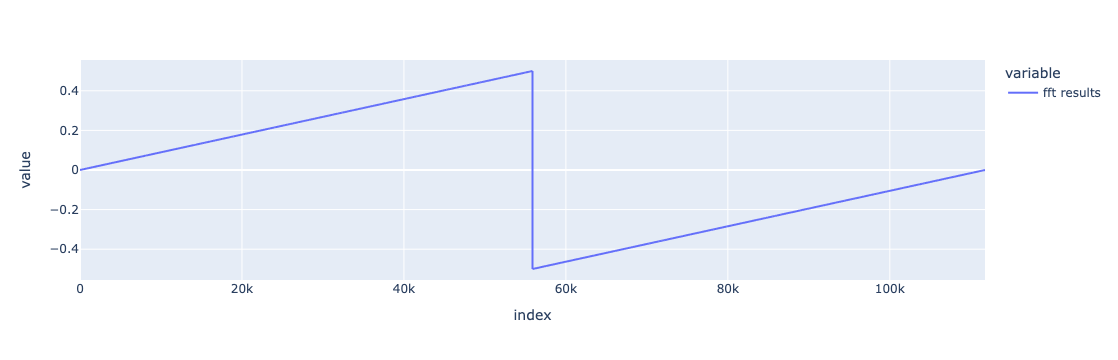

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -39.65367051106489,
  'P-value': 0.0,
  'Lags': np.int64(64),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -39.654
  P-value                         0.000
  Lags                               64
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-88.4907739088752),
  'P-value': 0.0,
  'Lags': 70,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -88.491
  P-value                         0.000
  Lags                               70
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -32.17292898008458,
  'P-value': 0.0,
  'Lags': np.int64(64),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -32.173
  P-value                         0.000
  Lags                               64
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}